In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

### 동대문구 내 따릉이 대여소 정보

In [2]:
Bike_Stop = pd.read_excel('./raw data/대여소/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx')
Bike_Stop_ID = Bike_Stop.groupby('대여소_구')['대여소ID'].unique().loc['동대문구']
Bike_Stop_ID = np.append(Bike_Stop_ID, 664)
Bike_Stop_ID = Bike_Stop_ID.astype(np.int64)
Bike_Stop_ID

array([600, 601, 602, 604, 605, 606, 607, 608, 609, 610, 612, 613, 614,
       615, 616, 617, 621, 622, 623, 624, 625, 626, 627, 628, 630, 631,
       633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 646, 647,
       648, 650, 651, 652, 654, 656, 657, 658, 659, 660, 661, 663, 664],
      dtype=int64)

### 동대문구 Inflow & Outflow 정보 불러오기

In [3]:
import os
dirs = os.getcwd() + '/pickled data/1111_ML/'
files = os.listdir(dirs)
files = [file for file in files if 'final' in file]
files

['동대문구 대여정보_Inflow_final.pkl', '동대문구 대여정보_Outflow_final.pkl']

In [4]:
Bike_Inflow = pd.read_pickle(dirs+files[0])
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,612,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
1,648,15,2019,1,1,1,0,-5.5,NaN,1.0,54.0
2,660,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
3,659,15,2019,1,1,1,0,-5.5,NaN,1.0,54.0
4,623,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
761005,630,15,2020,6,30,1,23,18.7,0.0,3.3,87.0
761006,607,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
761007,636,9,2020,6,30,1,23,18.7,0.0,3.3,87.0
761008,663,10,2020,6,30,1,23,18.7,0.0,3.3,87.0


In [5]:
Bike_Outflow = pd.read_pickle(dirs+files[1])
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,646,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
1,624,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
2,615,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
3,640,6,2019,1,1,1,0,-5.5,NaN,1.0,54.0
4,613,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
745582,623,20,2020,6,30,1,23,18.7,0.0,3.3,87.0
745583,660,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
745584,641,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
745585,627,10,2020,6,30,1,23,18.7,0.0,3.3,87.0


### 대여소 단위로 데이터 프레임 만들기

In [6]:
Bike_Inflow['반납대여소ID'].value_counts()

602    43093
646    34112
634    31514
650    26492
631    25365
648    24605
633    22555
613    21642
641    21253
614    20568
625    19892
609    19471
635    19248
623    19157
630    19041
624    18948
612    18452
627    17319
622    16717
660    16462
663    15958
659    15952
643    15851
642    15143
639    15027
661    14979
657    12744
617    12562
605    12278
626    12264
637    11734
658    11496
615    11417
638    10698
647    10383
651    10011
636     9735
607     9509
604     9122
640     8775
601     8569
606     8468
656     7565
610     7284
654     5978
652     5289
628     4940
621     3625
608     3593
600     1745
616     1494
664      916
Name: 반납대여소ID, dtype: int64

In [7]:
Bike_Outflow['대여대여소ID'].value_counts()

602    35426
634    31306
646    30520
623    28926
650    27177
631    25327
648    23293
614    23013
613    21114
641    20946
633    20859
609    20676
635    19660
630    18987
612    18018
639    17878
625    17813
659    16909
660    16366
624    15839
627    15833
642    15219
663    15177
661    14755
622    13908
637    13236
643    13220
605    11940
615    11789
657    11783
626    11702
617    11359
651    10292
658    10255
638     9473
647     8856
601     8596
636     8558
604     8380
640     8086
607     8077
610     7717
606     7466
656     7219
654     6711
628     5169
652     5030
616     4933
621     4441
608     3353
600     2091
664      910
Name: 대여대여소ID, dtype: int64

### 반납건수, 대여건수 Column 추가

In [8]:
Bike_Inflow['반납건수'] = 1
Bike_Inflow = Bike_Inflow.replace(np.nan, 0)
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,612,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,648,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,660,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,659,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,623,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
761005,630,15,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761006,607,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761007,636,9,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761008,663,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


In [9]:
Bike_Outflow['대여건수'] = 1
Bike_Outflow = Bike_Outflow.replace(np.nan, 0)
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,646,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,624,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,615,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,640,6,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,613,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
745582,623,20,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745583,660,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745584,641,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745585,627,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


//////////////////////////////////////////////////
### 가장 트래픽이 활발했던 602번 대여소

#### Inflow

In [10]:
Inflow_602 = Bike_Inflow[Bike_Inflow['반납대여소ID'] == 602].copy()
Inflow_602.reset_index(drop = True, inplace = True)
Inflow_602

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,602,10,2019,1,1,1,1,-5.9,0.0,1.8,56.0,1
1,602,10,2019,1,1,1,1,-5.9,0.0,1.8,56.0,1
2,602,10,2019,1,1,1,4,-7.2,0.0,1.2,57.0,1
3,602,10,2019,1,1,1,4,-7.2,0.0,1.2,57.0,1
4,602,10,2019,1,1,1,4,-7.2,0.0,1.2,57.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43088,602,10,2020,6,30,1,20,20.0,0.0,3.8,78.0,1
43089,602,10,2020,6,30,1,20,20.0,0.0,3.8,78.0,1
43090,602,10,2020,6,30,1,20,20.0,0.0,3.8,78.0,1
43091,602,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1


In [11]:
cols_in = ['연도', '월', '일', '요일', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']

Inflow_602 = Inflow_602.groupby(cols_in)['반납건수'].sum().reset_index()

#Inflow_602 = Inflow_602.groupby(cols_in)['반납건수'].agg({
#    "반납건수": 'sum'
#}).reset_index()


In [12]:
# 
Inflow_602

,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,2019,1,1,1,1,-5.9,0.0,1.8,56.0,2
1,2019,1,1,1,4,-7.2,0.0,1.2,57.0,4
2,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
3,2019,1,1,1,7,-7.7,0.0,1.3,58.0,1
4,2019,1,1,1,11,-3.7,0.0,2.5,41.0,5
...,...,...,...,...,...,...,...,...,...,...
8943,2020,6,30,1,17,22.5,0.0,5.8,64.0,5
8944,2020,6,30,1,18,21.7,0.0,5.6,66.0,9
8945,2020,6,30,1,19,20.6,0.0,5.0,72.0,5
8946,2020,6,30,1,20,20.0,0.0,3.8,78.0,7


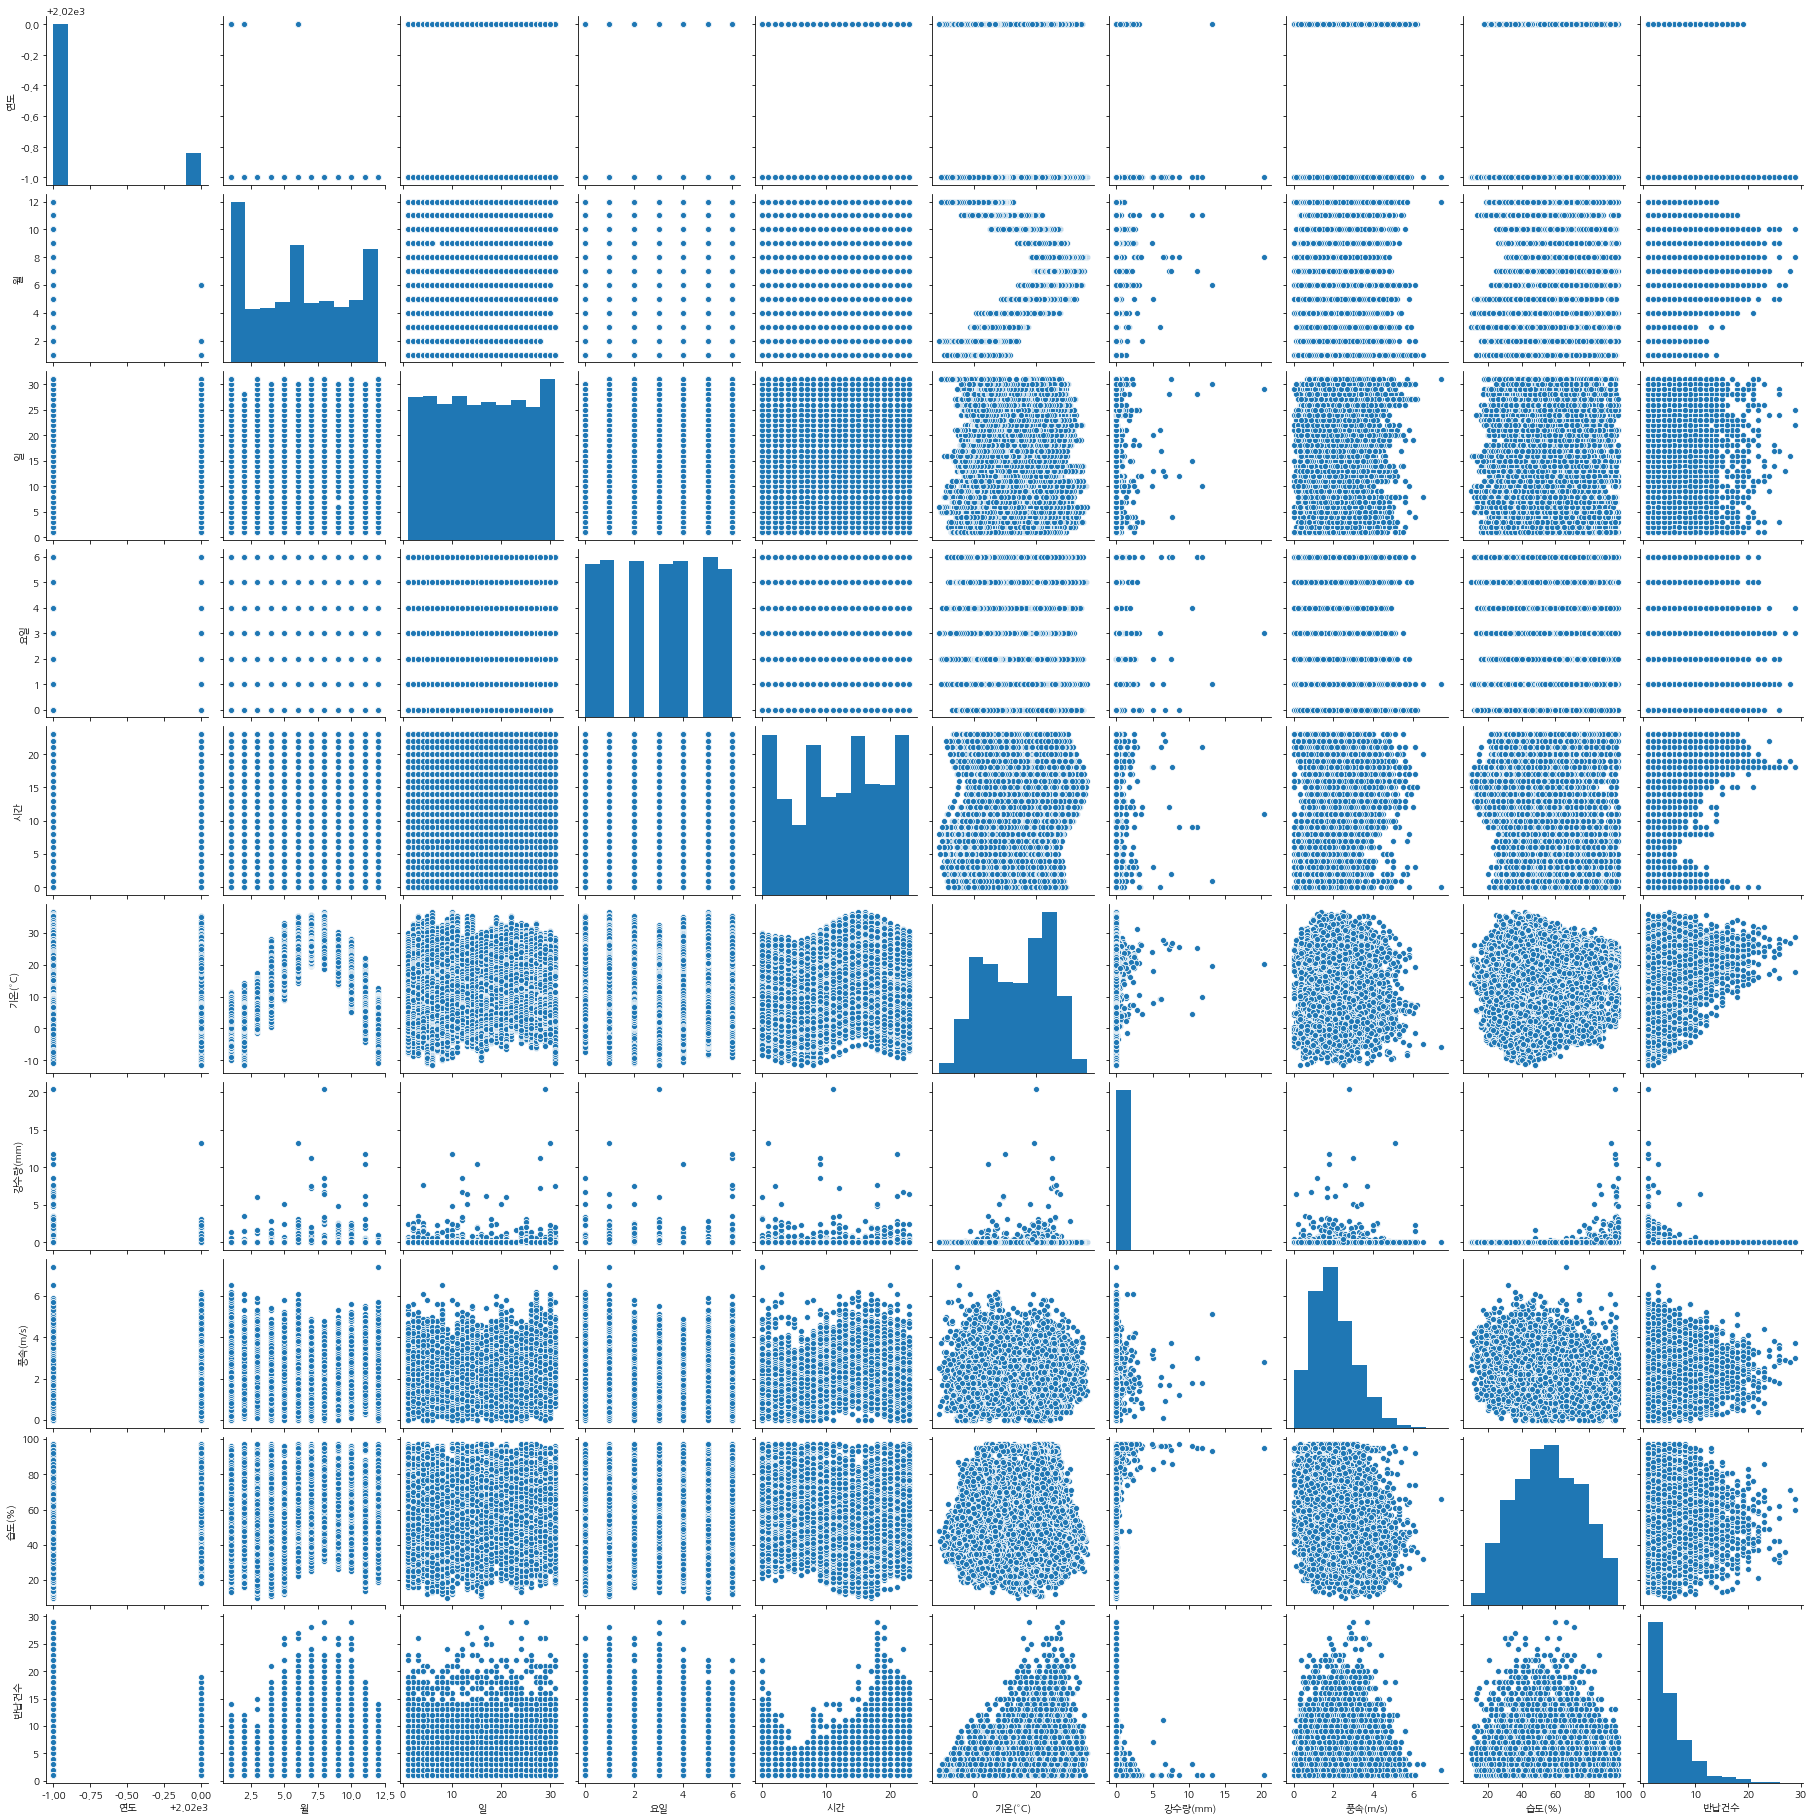

In [13]:
sns.pairplot(Inflow_602)
plt.show()

#### Outflow

In [14]:
Outflow_602 = Bike_Outflow[Bike_Outflow['대여대여소ID'] == 602].copy()
Outflow_602.reset_index(drop = True, inplace = True)
Outflow_602

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,602,10,2019,1,1,1,1,-5.9,0.0,1.8,56.0,1
1,602,10,2019,1,1,1,1,-5.9,0.0,1.8,56.0,1
2,602,10,2019,1,1,1,3,-6.9,0.0,2.2,62.0,1
3,602,10,2019,1,1,1,3,-6.9,0.0,2.2,62.0,1
4,602,10,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
35421,602,10,2020,6,30,1,22,18.6,0.2,3.3,88.0,1
35422,602,10,2020,6,30,1,22,18.6,0.2,3.3,88.0,1
35423,602,10,2020,6,30,1,22,18.6,0.2,3.3,88.0,1
35424,602,10,2020,6,30,1,22,18.6,0.2,3.3,88.0,1


In [15]:
cols_out = ['연도', '월', '일', '요일', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']

Outflow_602 = Outflow_602.groupby(cols_out)['대여건수'].sum().reset_index()

In [16]:
Outflow_602

,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,2019,1,1,1,1,-5.9,0.0,1.8,56.0,2
1,2019,1,1,1,3,-6.9,0.0,2.2,62.0,2
2,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
3,2019,1,1,1,7,-7.7,0.0,1.3,58.0,1
4,2019,1,1,1,11,-3.7,0.0,2.5,41.0,2
...,...,...,...,...,...,...,...,...,...,...
8462,2020,6,30,1,19,20.6,0.0,5.0,72.0,6
8463,2020,6,30,1,20,20.0,0.0,3.8,78.0,2
8464,2020,6,30,1,21,18.9,0.5,2.5,84.0,2
8465,2020,6,30,1,22,18.6,0.2,3.3,88.0,4


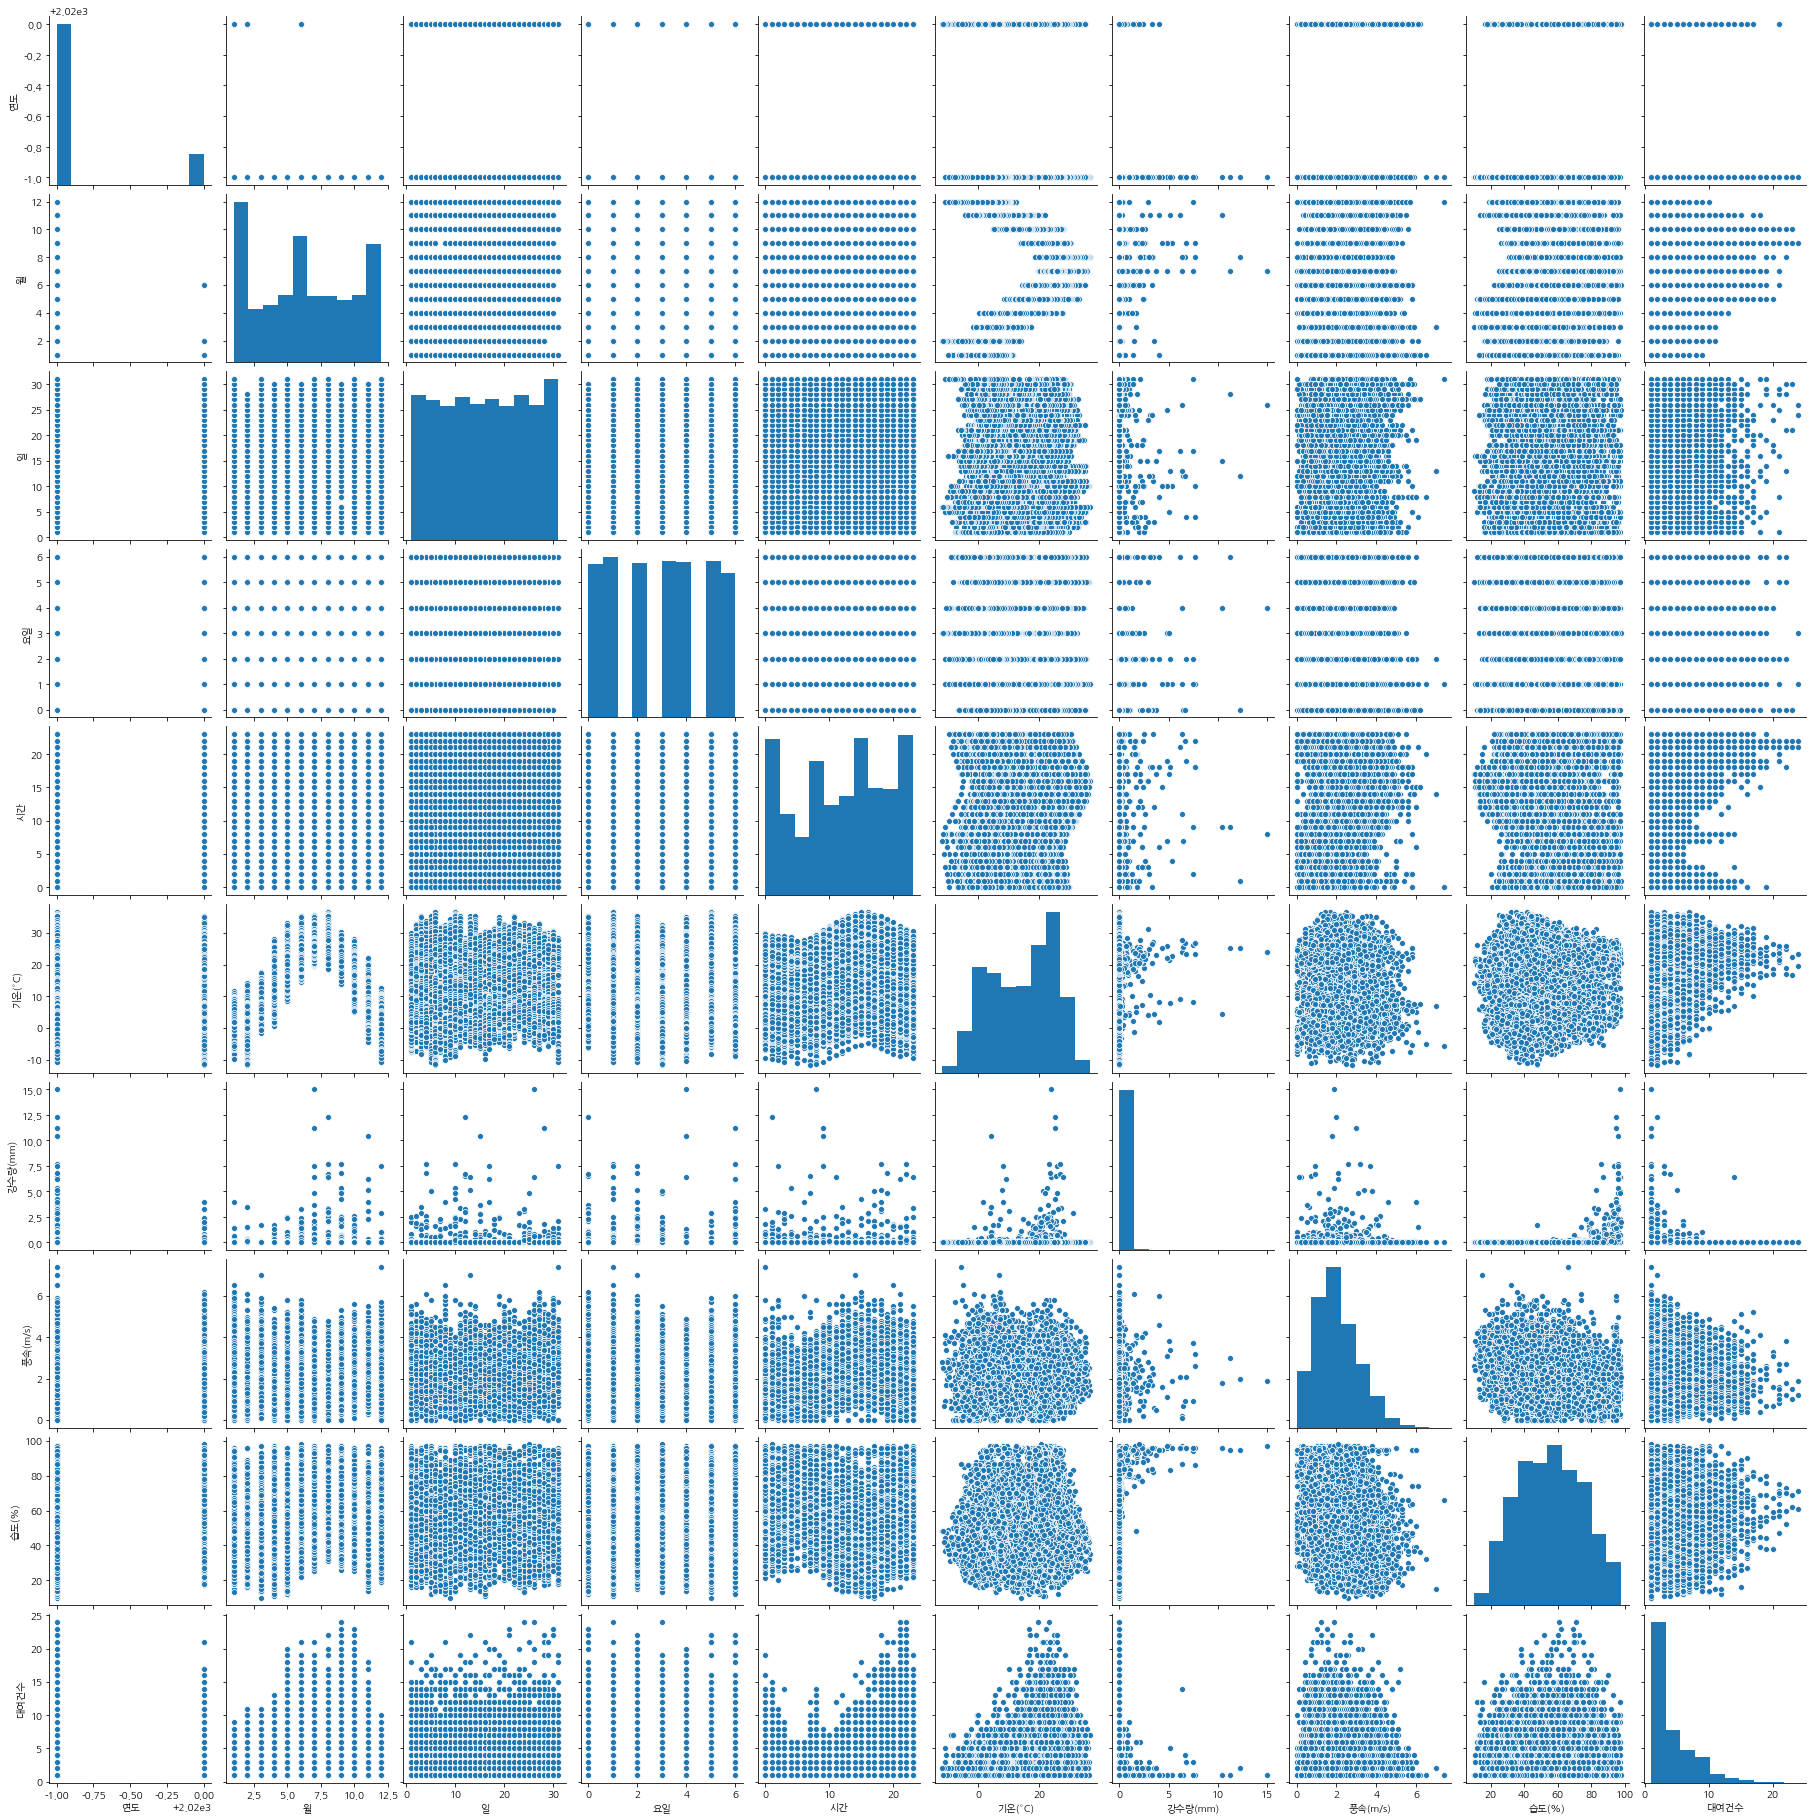

In [17]:
sns.pairplot(Outflow_602)
plt.show()

### 모델링 - Inflow_602

In [47]:
Inflow_602.columns.values

array(['연도', '월', '일', '요일', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)',
       '습도(%)', '반납건수'], dtype=object)

In [48]:
Inflow_602 = Inflow_602.join(pd.get_dummies(Inflow_602['요일'], prefix="요일"))
Inflow_602

,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2019,1,1,1,1,-5.9,0.0,1.8,56.0,2,0,1,0,0,0,0,0
1,2019,1,1,1,4,-7.2,0.0,1.2,57.0,4,0,1,0,0,0,0,0
2,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1,0,1,0,0,0,0,0
3,2019,1,1,1,7,-7.7,0.0,1.3,58.0,1,0,1,0,0,0,0,0
4,2019,1,1,1,11,-3.7,0.0,2.5,41.0,5,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,2020,6,30,1,17,22.5,0.0,5.8,64.0,5,0,1,0,0,0,0,0
8944,2020,6,30,1,18,21.7,0.0,5.6,66.0,9,0,1,0,0,0,0,0
8945,2020,6,30,1,19,20.6,0.0,5.0,72.0,5,0,1,0,0,0,0,0
8946,2020,6,30,1,20,20.0,0.0,3.8,78.0,7,0,1,0,0,0,0,0


#### 의미있는 features (반납건수 알기 위해서)
- 월, 요일, 시간, 기온, 강수량, 풍속, 습도

In [49]:
dayofweek = ["요일_"+str(i) for i in range(7)]
features = ['월', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)'] + dayofweek
features

['월',
 '시간',
 '기온(°C)',
 '강수량(mm)',
 '풍속(m/s)',
 '습도(%)',
 '요일_0',
 '요일_1',
 '요일_2',
 '요일_3',
 '요일_4',
 '요일_5',
 '요일_6']

#### Train, Test 데이터 나누기

In [51]:
from sklearn.model_selection import train_test_split
# train : test = 8 : 2 비율
x_train, x_test, y_train, y_test = train_test_split(Inflow_602[features], Inflow_602['반납건수'], test_size = 0.2, random_state = 42)

In [52]:
print(x_train.shape) # 학습용 데이터는 7158개
print(x_test.shape) # 테스트용 데이터는 1790개

(7158, 13)
(1790, 13)


#### 학습
- scikit-learn에 있는 regression 모델들 써보기
- 최적의 모델은?

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    ('LogisticRegression', lm.LogisticRegression()),
    ('SGDRegressor', lm.SGDRegressor()),
    ('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]

n = 3 
params = { 
    'lr' : { 
        'fit_intercept': [True, False], 
        'normalize': [True, False], 
    }, 
    'ridge': { 
        'alpha': [0.01, 0.1, 1.0, 10, 100], 
        'fit_intercept': [True, False], 
        'normalize': [True, False], 
    }, 
    'lasso': { 
        'alpha': [0.1, 1.0, 10], 
        'fit_intercept': [True, False], 
        'normalize': [True, False], 
    }, 
    'elastic': { 
        'alpha': [0.1, 1.0, 10], 
        'normalize': [True, False], 
        'fit_intercept': [True, False], 
    }, 
    'LassoLars': { 
        'alpha': [0.1, 1.0, 10], 
        'normalize': [True, False], 
        'fit_intercept': [True, False], 
    }, 
    'LogisticRegression': { 
        'penalty': ['l1', 'l2'], 
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100], 
        'fit_intercept': [True, False], 
    }, 
    'SGDRegressor': { 
        'penalty': ['l1', 'l2'], 
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100], 
        'fit_intercept': [True, False], 
    }, 
    'Perceptron' :{ 
        'penalty': ['None', 'l1', 'l2'], 
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100], 
        'fit_intercept': [True, False] 
    }, 
    'xgboost': { 
        "gamma": uniform(0, 0.5).rvs(n), 
        "max_depth": range(2, 7), # default 3 
        "n_estimators": randint(100, 150).rvs(n), # default 100 
    } 
} 

best_model, best_mae = None, float('inf') 
for model_name, model in models: 
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid) 
    grid = grid.fit(x_train, y_train) 
    
    model = grid.best_estimator_ 
    predictions = model.predict(x_test) 
    mae = mean_absolute_error(y_test, predictions) 
    
    print(model_name, mae) 
    
    if mae < best_mae: 
        best_model = model



lr 2.5597978259333316
ridge 2.5597915740096853
lasso 2.565557232750446
elastic 2.562006247837826
LassoLars 2.5655572268419196
LogisticRegression 2.6759776536312847
SGDRegressor 2.989231202931475
Perceptron 3.6575418994413407
[12:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 1.7322861785828734


#### xgboost 모델이 MAE 1.732 정도로 제일 낮았다 (best_model = xgboost)

In [56]:
best_model

XGBRegressor(gamma=0.24714164807668376, max_depth=5, n_estimators=119)

In [57]:
'''
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0.35336819357599547, 
             importance_type='gain', learning_rate=0.1, max_delta_step=0, 
             max_depth=6, min_child_weight=1, missing=None, n_estimators=102,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0, 
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, 
             silent=True, subsample=1)
'''

"\nXGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bytree=1, gamma=0.35336819357599547, \n             importance_type='gain', learning_rate=0.1, max_delta_step=0, \n             max_depth=6, min_child_weight=1, missing=None, n_estimators=102,\n             n_jobs=1, nthread=None, objective='reg:linear', random_state=0, \n             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, \n             silent=True, subsample=1)\n"

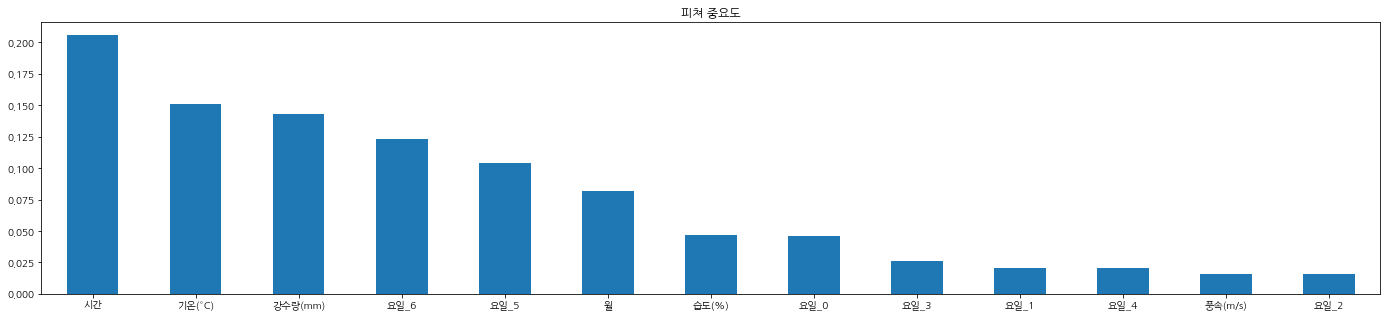

In [60]:
feature_importance = pd.Series(index=features, data=best_model.feature_importances_).sort_values(ascending=False) 
feature_importance.plot(kind='bar', figsize=(24, 5), title="피쳐 중요도", rot=0) 
plt.show()

- 시간의 영향이 압도적으로 큼
- 요일_5, 요일_6, 즉 주말이냐 아니냐도 영향이 큼

#### 예측값, 실제값, 오차값의 분포

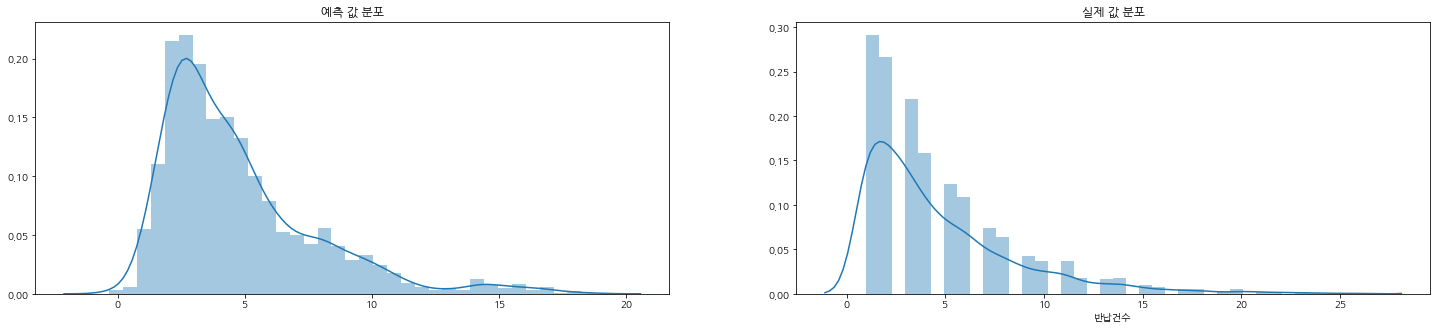

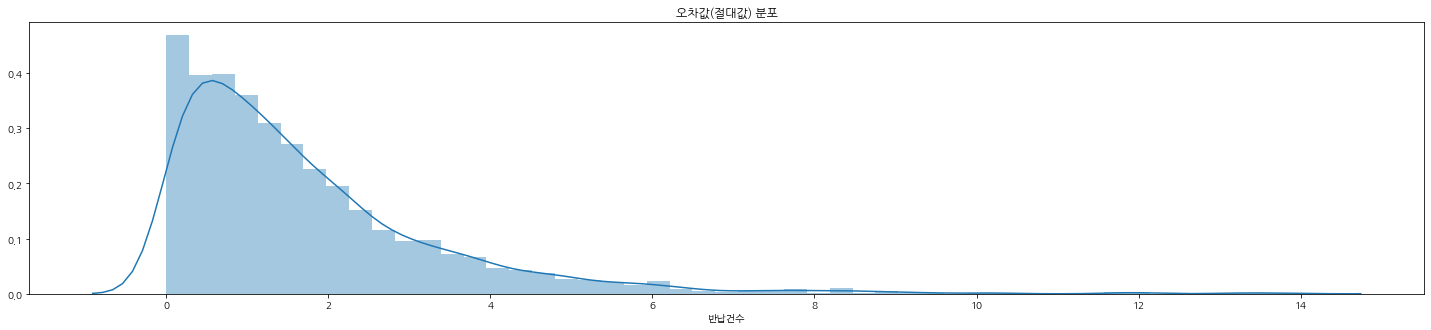

In [61]:
predictions = best_model.predict(x_test) 

fig, axes = plt.subplots(1, 2, figsize=(25, 5)) 
sns.distplot(predictions, ax=axes[0]) 
axes[0].set_title("예측 값 분포") 
sns.distplot(y_test, ax=axes[1]) 
axes[1].set_title("실제 값 분포") 
plt.show() 

plt.figure(figsize=(25, 5)) 
sns.distplot(abs(predictions - y_test)) 
plt.title("오차값(절대값) 분포") 
plt.show()

- 실제값에 몇 이상치가 있음을 알 수 있음
- 우리 모델에서는 이런 이상치까지는 잡지 못한 듯
    - train data에는 없고, test data에만 있는 이상치일 듯 (일반적인 패턴 X, 공휴일 등의 특정 이벤트)
- 따라서 오차값에도 큰 이상치 등장    
- 이를 다 예측할 수 있는 모델 만들면 MAE 더 감소할 것

//////////////////////////////////////

### 동대문구 내 모든 대여소에 대한 각각의 모델들 (xgboost) - Inflow

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

n = 3

In [11]:
dayofweek = ["요일_"+str(i) for i in range(7)]
features = ['월', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)'] + dayofweek
features
type(features)

list

In [12]:
#cols_inflow = ['연도', '월', '일', '요일', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
cols_inflow = ['월', '요일', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']

results = {}
total = Bike_Inflow['반납대여소ID'].nunique()

for idx, (name, df) in enumerate(Bike_Inflow.groupby('반납대여소ID'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')
    
    try:
        df = df.groupby(cols_inflow)['반납건수'].sum().reset_index()
        df = df.join(pd.get_dummies(df['요일'], prefix="요일"))

        print(df.shape)

        x_train, x_test, y_train, y_test = train_test_split(df[features], df['반납건수'], test_size=0.2, random_state=42)

        param_grid = {
            "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 7), # default 3
            "n_estimators": randint(100, 150).rvs(n), # default 100
        }

        grid = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(x_train, y_train)

        model = grid.best_estimator_
        predictions = model.predict(x_test)
        mae = mean_absolute_error(y_test, predictions)

        results[str(name)] = {}
        results[str(name)]['model'] = model
        results[str(name)]['mae'] = mae
        results[str(name)]['errors'] = predictions - y_test
        
    except:
        continue

[1/52] 600 (1414, 15)
[2/52] 601 (5011, 15)
[3/52] 602 (8948, 15)
[4/52] 604 (4643, 15)
[5/52] 605 (5748, 15)
[6/52] 606 (4372, 15)
[7/52] 607 (4521, 15)
[8/52] 608 (2706, 15)
[9/52] 609 (7168, 15)
[10/52] 610 (4456, 15)
[11/52] 612 (7033, 15)
[12/52] 613 (7801, 15)
[13/52] 614 (7296, 15)
[14/52] 615 (5471, 15)
[15/52] 616 (1265, 15)
[16/52] 617 (5634, 15)
[17/52] 621 (2671, 15)
[18/52] 622 (6840, 15)
[19/52] 623 (6676, 15)
[20/52] 624 (7007, 15)
[21/52] 625 (6876, 15)
[22/52] 626 (5612, 15)
[23/52] 627 (6752, 15)
[24/52] 628 (3335, 15)
[25/52] 630 (6901, 15)
[26/52] 631 (7760, 15)
[27/52] 633 (7041, 15)
[28/52] 634 (7951, 15)
[29/52] 635 (6707, 15)
[30/52] 636 (4602, 15)
[31/52] 637 (5624, 15)
[32/52] 638 (4557, 15)
[33/52] 639 (6350, 15)
[34/52] 640 (4917, 15)
[35/52] 641 (6643, 15)
[36/52] 642 (6095, 15)
[37/52] 643 (5895, 15)
[38/52] 646 (8721, 15)
[39/52] 647 (5225, 15)
[40/52] 648 (7459, 15)
[41/52] 650 (7237, 15)
[42/52] 651 (5009, 15)
[43/52] 652 (3260, 15)
[44/52] 654 (3763, 1

In [13]:
errors = np.array([result['mae'] for result in results.values()])
errors.mean()

0.988854696500542

In [14]:
df

,월,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,1,0,0,-2.0,0.0,2.7,73.0,1,1,0,0,0,0,0,0
1,1,0,0,6.1,0.0,4.9,49.0,1,1,0,0,0,0,0,0
2,1,0,2,-3.2,0.0,1.6,73.0,1,1,0,0,0,0,0,0
3,1,0,8,-3.9,0.0,3.1,71.0,1,1,0,0,0,0,0,0
4,1,0,9,-3.9,0.0,3.7,66.0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,12,6,18,8.2,0.0,1.4,48.0,1,0,0,0,0,0,0,1
659,12,6,20,0.2,0.0,1.6,62.0,1,0,0,0,0,0,0,1
660,12,6,20,5.3,0.0,0.2,53.0,1,0,0,0,0,0,0,1
661,12,6,22,5.3,0.0,2.0,53.0,1,0,0,0,0,0,0,1


In [18]:
#results

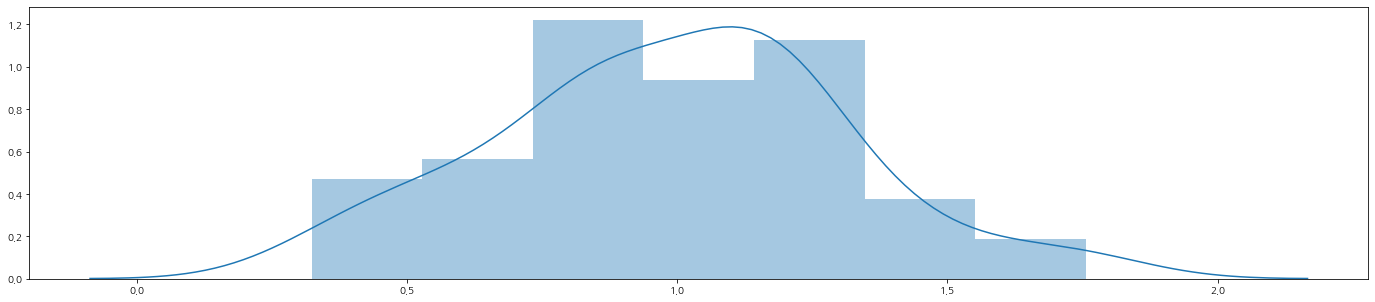

In [15]:
plt.figure(figsize=(24, 5)) 
sns.distplot(errors) 
plt.show()

In [17]:
#predictions_1 = results['602']['model'].predict([5, 15, 23, 0, 3, 5, 0, 1, 0, 0, 0, 0, 0]) 
#['월', '시간', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
temp = np.array([
    [5, 17, 20.0, 0.0, 2.1, 30.0, 0, 1, 0, 0, 0, 0, 0],
    [12, 17, -3.0, 0.0, 2.1, 30.0, 0, 0, 0, 0, 0, 1, 0],
    [8, 15, 35.0, 30.0, 2.1, 60.0, 0, 1, 0, 0, 0, 0, 0],
])
tmp_df = pd.DataFrame(temp, columns = features)
#results['635']['model'].predict(pd.DataFrame(temp, columns = features))
results['635']['model'].predict(tmp_df)
#test_individual = xgb.DMatrix(temp, label = features)

array([5.4704704, 1.4561807, 1.228163 ], dtype=float32)

In [19]:
x_test

,월,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
327,6,11,26.5,0.0,1.7,56.0,0,0,0,0,1,0,0
579,12,13,2.1,0.0,1.8,28.0,0,0,0,1,0,0,0
513,12,8,6.1,0.0,0.5,95.0,0,1,0,0,0,0,0
362,6,19,26.7,0.0,3.8,54.0,0,0,0,0,0,1,0
265,6,11,26.3,0.0,1.9,55.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,11,9,9.8,0.0,2.1,66.0,0,0,0,0,0,0,1
533,12,18,3.2,0.0,0.8,51.0,0,1,0,0,0,0,0
431,11,15,9.8,0.0,3.1,42.0,0,0,0,1,0,0,0
248,6,18,20.6,0.0,2.4,58.0,0,1,0,0,0,0,0


In [18]:
tmp_df

,월,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,5.0,17.0,20.0,0.0,2.1,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12.0,17.0,-3.0,0.0,2.1,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,15.0,35.0,30.0,2.1,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
